In [90]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from sklearn.metrics import mean_squared_error

<ipython-input-90-c73e25a21442>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


2012_financial_news     industrial_relation.tsv
README.txt              transaction_data.tsv


In [8]:
transaction_data = pd.read_csv('../../Chengdu80/dataset/transaction_data.tsv', sep='\t')

In [15]:
stocks = {}
for ticker in transaction_data['TICKER'].unique():
    stocks[ticker] = transaction_data[transaction_data['TICKER'] == ticker]

{'ORCL':            date TICKER       COMNAM  BIDLO  ASKHI  OPENPRC     PRC  \
0    2012/01/03   ORCL  ORACLE CORP  25.83  26.66    26.33  25.865   
1    2012/01/04   ORCL  ORACLE CORP  25.55  26.23    25.95  26.010   
2    2012/01/05   ORCL  ORACLE CORP  25.91  26.90    26.01  26.590   
3    2012/01/06   ORCL  ORACLE CORP  26.36  27.15    26.67  26.930   
4    2012/01/09   ORCL  ORACLE CORP  26.66  27.12    26.90  27.030   
..          ...    ...          ...    ...    ...      ...     ...   
245  2012/12/24   ORCL  ORACLE CORP  33.42  33.64    33.46  33.610   
246  2012/12/26   ORCL  ORACLE CORP  33.34  33.85    33.67  33.610   
247  2012/12/27   ORCL  ORACLE CORP  33.00  33.62    33.54  33.270   
248  2012/12/28   ORCL  ORACLE CORP  33.00  33.49    33.04  33.020   
249  2012/12/31   ORCL  ORACLE CORP  32.69  33.46    32.91  33.320   

            VOL     SHROUT  
0    38081439.0  5025837.0  
1    45599113.0  5025837.0  
2    51020071.0  5025837.0  
3    55830810.0  5025837.0  
4    

In [82]:
df = stocks['MSFT']
print(df.columns)

Index(['date', 'TICKER', 'COMNAM', 'BIDLO', 'ASKHI', 'OPENPRC', 'PRC', 'VOL',
       'SHROUT'],
      dtype='object')


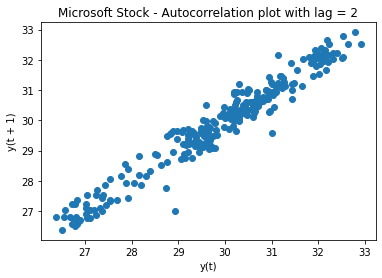

In [83]:
plt.figure()
lag_plot(df['OPENPRC'], lag=1)
plt.title('Microsoft Stock - Autocorrelation plot with lag = 2')
plt.show()

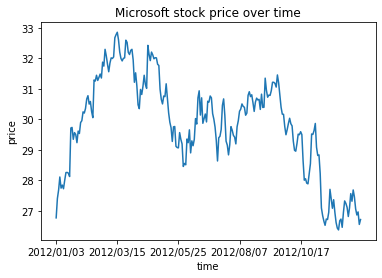

In [84]:
plt.plot(df["date"], df["PRC"])
plt.xticks(np.arange(0,250, 50), df['date'][0:250:50])
plt.title("Microsoft stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [93]:
train_proportion = 0.7

train_data, test_data = df[0:int(len(df)*train_proportion)], df[int(len(df)*train_proportion):]
training_data = train_data['PRC'].values
test_data = test_data['PRC'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
    print(ARIMAResults.summary(model_fit))
    
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  174
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -83.743
Method:                       css-mle   S.D. of innovations              0.391
Date:                Mon, 26 Oct 2020   AIC                            181.486
Time:                        19:34:14   BIC                            203.600
Sample:                             1   HQIC                           190.457
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0214      0.021      1.033      0.302      -0.019       0.062
ar.L1.D.y      0.1783      0.249      0.717      0.473      -0.309       0.666
ar.L2.D.y     -0.0213      0.080     -0.266      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  178
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -83.867
Method:                       css-mle   S.D. of innovations              0.387
Date:                Mon, 26 Oct 2020   AIC                            181.735
Time:                        19:34:15   BIC                            204.007
Sample:                             1   HQIC                           190.767
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0231      0.020      1.138      0.255      -0.017       0.063
ar.L1.D.y      0.1743      0.245      0.711      0.477      -0.306       0.655
ar.L2.D.y     -0.0232      0.079     -0.295      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  182
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -84.550
Method:                       css-mle   S.D. of innovations              0.385
Date:                Mon, 26 Oct 2020   AIC                            183.100
Time:                        19:34:15   BIC                            205.528
Sample:                             1   HQIC                           192.192
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0231      0.020      1.160      0.246      -0.016       0.062
ar.L1.D.y      0.1735      0.245      0.708      0.479      -0.307       0.654
ar.L2.D.y     -0.0218      0.079     -0.277      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  186
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -86.159
Method:                       css-mle   S.D. of innovations              0.384
Date:                Mon, 26 Oct 2020   AIC                            186.318
Time:                        19:34:16   BIC                            208.898
Sample:                             1   HQIC                           195.468
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0181      0.020      0.903      0.367      -0.021       0.057
ar.L1.D.y      0.1888      0.251      0.751      0.452      -0.304       0.681
ar.L2.D.y     -0.0207      0.077     -0.270      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  190
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -87.603
Method:                       css-mle   S.D. of innovations              0.384
Date:                Mon, 26 Oct 2020   AIC                            189.207
Time:                        19:34:17   BIC                            211.936
Sample:                             1   HQIC                           198.414
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0153      0.021      0.745      0.456      -0.025       0.056
ar.L1.D.y      0.1866      0.274      0.681      0.496      -0.351       0.724
ar.L2.D.y     -0.0190      0.076     -0.249      0.8

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  195
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -88.837
Method:                       css-mle   S.D. of innovations              0.381
Date:                Mon, 26 Oct 2020   AIC                            191.673
Time:                        19:34:18   BIC                            214.584
Sample:                             1   HQIC                           200.950
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0113      0.020      0.559      0.576      -0.028       0.051
ar.L1.D.y      0.1800      0.262      0.688      0.491      -0.333       0.693
ar.L2.D.y     -0.0191      0.075     -0.255      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  199
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -88.997
Method:                       css-mle   S.D. of innovations              0.378
Date:                Mon, 26 Oct 2020   AIC                            191.994
Time:                        19:34:19   BIC                            215.047
Sample:                             1   HQIC                           201.324
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0121      0.020      0.615      0.538      -0.026       0.051
ar.L1.D.y      0.1826      0.254      0.718      0.473      -0.316       0.681
ar.L2.D.y     -0.0209      0.074     -0.284      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  203
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -92.765
Method:                       css-mle   S.D. of innovations              0.382
Date:                Mon, 26 Oct 2020   AIC                            199.530
Time:                        19:34:19   BIC                            222.722
Sample:                             1   HQIC                           208.912
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0067      0.020      0.338      0.735      -0.032       0.045
ar.L1.D.y      0.2191      0.234      0.936      0.349      -0.240       0.678
ar.L2.D.y     -0.0242      0.073     -0.332      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  207
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -92.946
Method:                       css-mle   S.D. of innovations              0.379
Date:                Mon, 26 Oct 2020   AIC                            199.891
Time:                        19:34:20   BIC                            223.220
Sample:                             1   HQIC                           209.325
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.020      0.294      0.769      -0.033       0.044
ar.L1.D.y      0.2296      0.231      0.993      0.321      -0.224       0.683
ar.L2.D.y     -0.0199      0.071     -0.278      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  211
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -96.301
Method:                       css-mle   S.D. of innovations              0.382
Date:                Mon, 26 Oct 2020   AIC                            206.602
Time:                        19:34:21   BIC                            230.065
Sample:                             1   HQIC                           216.087
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0110      0.020      0.558      0.577      -0.028       0.050
ar.L1.D.y      0.2920      0.231      1.263      0.207      -0.161       0.745
ar.L2.D.y     -0.0056      0.071     -0.079      0.9

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  215
Model:                 ARIMA(4, 1, 1)   Log Likelihood                 -97.772
Method:                       css-mle   S.D. of innovations              0.381
Date:                Mon, 26 Oct 2020   AIC                            209.543
Time:                        19:34:21   BIC                            233.138
Sample:                             1   HQIC                           219.076
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0092      0.019      0.485      0.628      -0.028       0.047
ar.L1.D.y      0.3127      0.210      1.490      0.136      -0.099       0.724
ar.L2.D.y     -0.0108      0.071     -0.152      0.8

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  220
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -104.829
Method:                       css-mle   S.D. of innovations              0.390
Date:                Mon, 26 Oct 2020   AIC                            223.658
Time:                        19:34:22   BIC                            247.413
Sample:                             1   HQIC                           233.251
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.021     -0.005      0.996      -0.042       0.042
ar.L1.D.y      0.3824      0.259      1.479      0.139      -0.125       0.889
ar.L2.D.y     -0.0026      0.071     -0.036      0.9

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  224
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -106.435
Method:                       css-mle   S.D. of innovations              0.389
Date:                Mon, 26 Oct 2020   AIC                            226.871
Time:                        19:34:23   BIC                            250.752
Sample:                             1   HQIC                           236.510
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0024      0.021      0.116      0.908      -0.039       0.044
ar.L1.D.y      0.4297      0.257      1.670      0.095      -0.075       0.934
ar.L2.D.y     -0.0032      0.072     -0.044      0.9

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  228
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -107.450
Method:                       css-mle   S.D. of innovations              0.388
Date:                Mon, 26 Oct 2020   AIC                            228.900
Time:                        19:34:24   BIC                            252.905
Sample:                             1   HQIC                           238.585
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.021      0.015      0.988      -0.040       0.041
ar.L1.D.y      0.4043      0.241      1.679      0.093      -0.068       0.876
ar.L2.D.y     -0.0088      0.071     -0.125      0.9

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  233
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -108.044
Method:                       css-mle   S.D. of innovations              0.385
Date:                Mon, 26 Oct 2020   AIC                            230.089
Time:                        19:34:25   BIC                            254.246
Sample:                             1   HQIC                           239.830
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0009      0.020     -0.046      0.963      -0.040       0.038
ar.L1.D.y      0.4288      0.230      1.866      0.062      -0.022       0.879
ar.L2.D.y     -0.0119      0.070     -0.170      0.8

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  237
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -109.460
Method:                       css-mle   S.D. of innovations              0.384
Date:                Mon, 26 Oct 2020   AIC                            232.921
Time:                        19:34:26   BIC                            257.197
Sample:                             1   HQIC                           242.706
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0007      0.020      0.034      0.973      -0.038       0.039
ar.L1.D.y      0.4497      0.228      1.973      0.049       0.003       0.896
ar.L2.D.y     -0.0183      0.070     -0.259      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  241
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -110.919
Method:                       css-mle   S.D. of innovations              0.383
Date:                Mon, 26 Oct 2020   AIC                            235.838
Time:                        19:34:27   BIC                            260.232
Sample:                             1   HQIC                           245.666
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0021      0.020      0.108      0.914      -0.036       0.041
ar.L1.D.y      0.4322      0.244      1.772      0.076      -0.046       0.910
ar.L2.D.y     -0.0256      0.069     -0.369      0.7

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  245
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -111.757
Method:                       css-mle   S.D. of innovations              0.382
Date:                Mon, 26 Oct 2020   AIC                            237.514
Time:                        19:34:28   BIC                            262.023
Sample:                             1   HQIC                           247.384
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.019      0.033      0.973      -0.037       0.038
ar.L1.D.y      0.4216      0.237      1.775      0.076      -0.044       0.887
ar.L2.D.y     -0.0225      0.068     -0.328      0.7

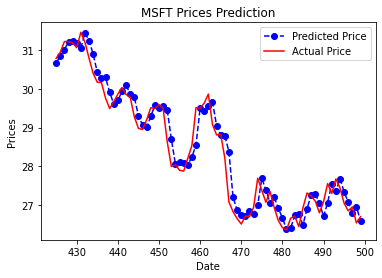

In [95]:
test_set_range = df[int(len(df)*0.7):].index

plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('MSFT Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
df['date'][test_set_range[0]:test_set_range[-1]:50]
plt.legend()
plt.show()